# **1. Data Exploration and Visualization**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

data = pd.read_csv('datasets_house_prices.csv')

Perform an exploratory data analysis (EDA) to understand the relationships between the features and the house prices.

In [ ]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (sqft)                    1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Age                            1000 non-null   int64  
 3   Proximity to Downtown (miles)  1000 non-null   float64
 4   Price                          1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB
None
       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2

Visualize the data using scatter plots, histograms, and correlation matrices to identify potential patterns and relationships.

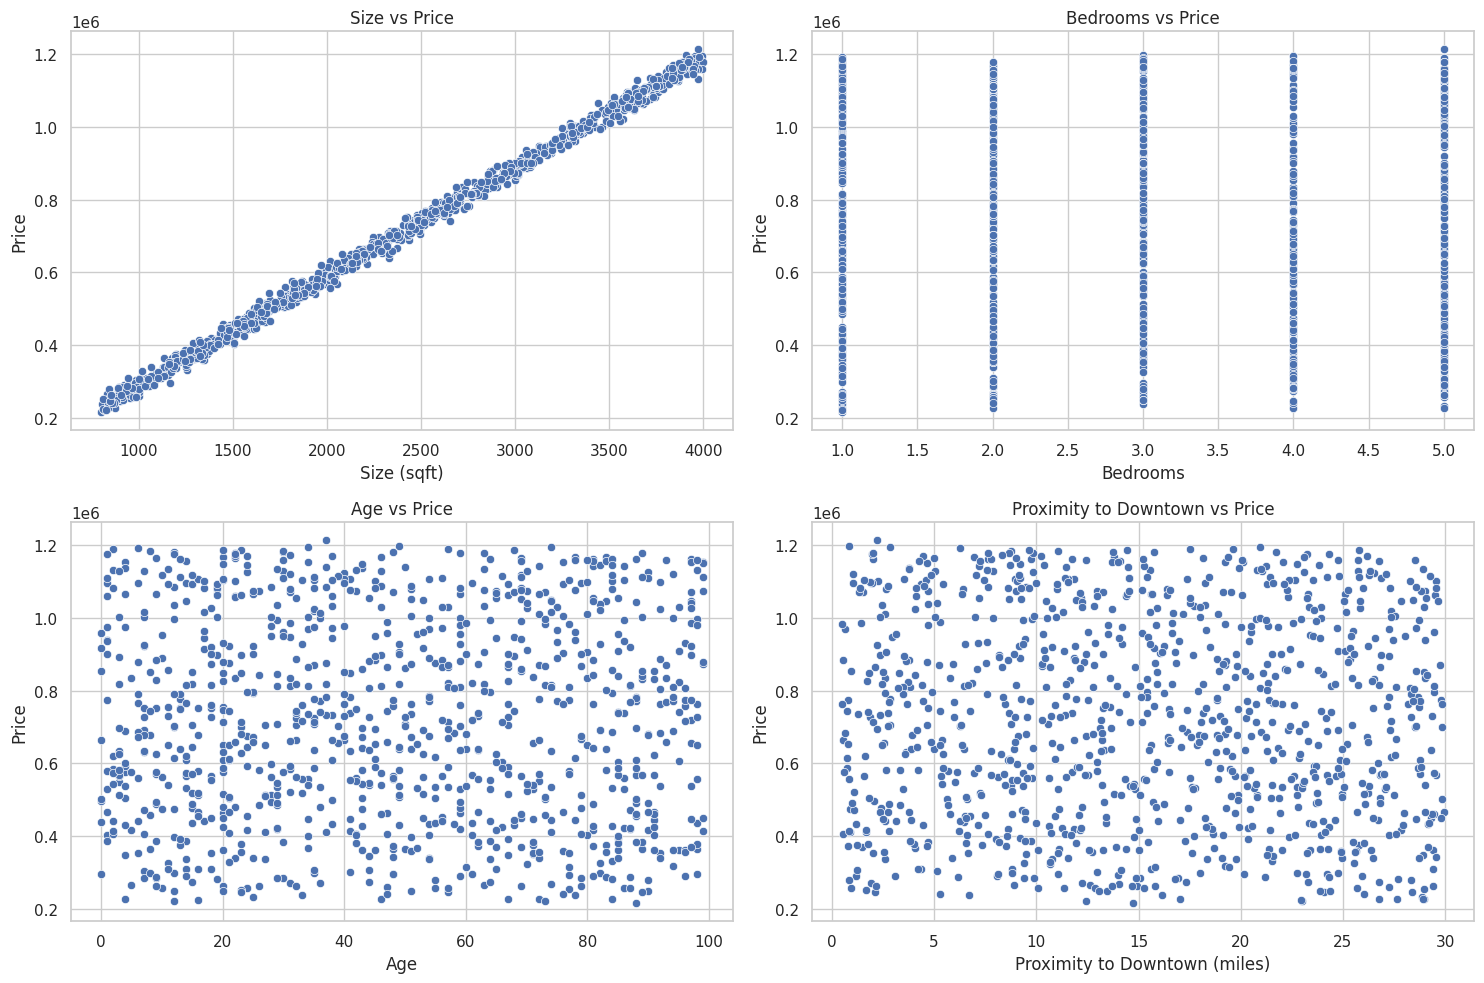

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(15, 10))

# Size vs Price
plt.subplot(2, 2, 1)
sns.scatterplot(x='Size (sqft)', y='Price', data=data)
plt.title('Size vs Price')

# Bedrooms vs Price
plt.subplot(2, 2, 2)
sns.scatterplot(x='Bedrooms', y='Price', data=data)
plt.title('Bedrooms vs Price')

# Age vs Price
plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Price', data=data)
plt.title('Age vs Price')

# Proximity to Downtown vs Price
plt.subplot(2, 2, 4)
sns.scatterplot(x='Proximity to Downtown (miles)', y='Price', data=data)
plt.title('Proximity to Downtown vs Price')

plt.tight_layout()
plt.show()

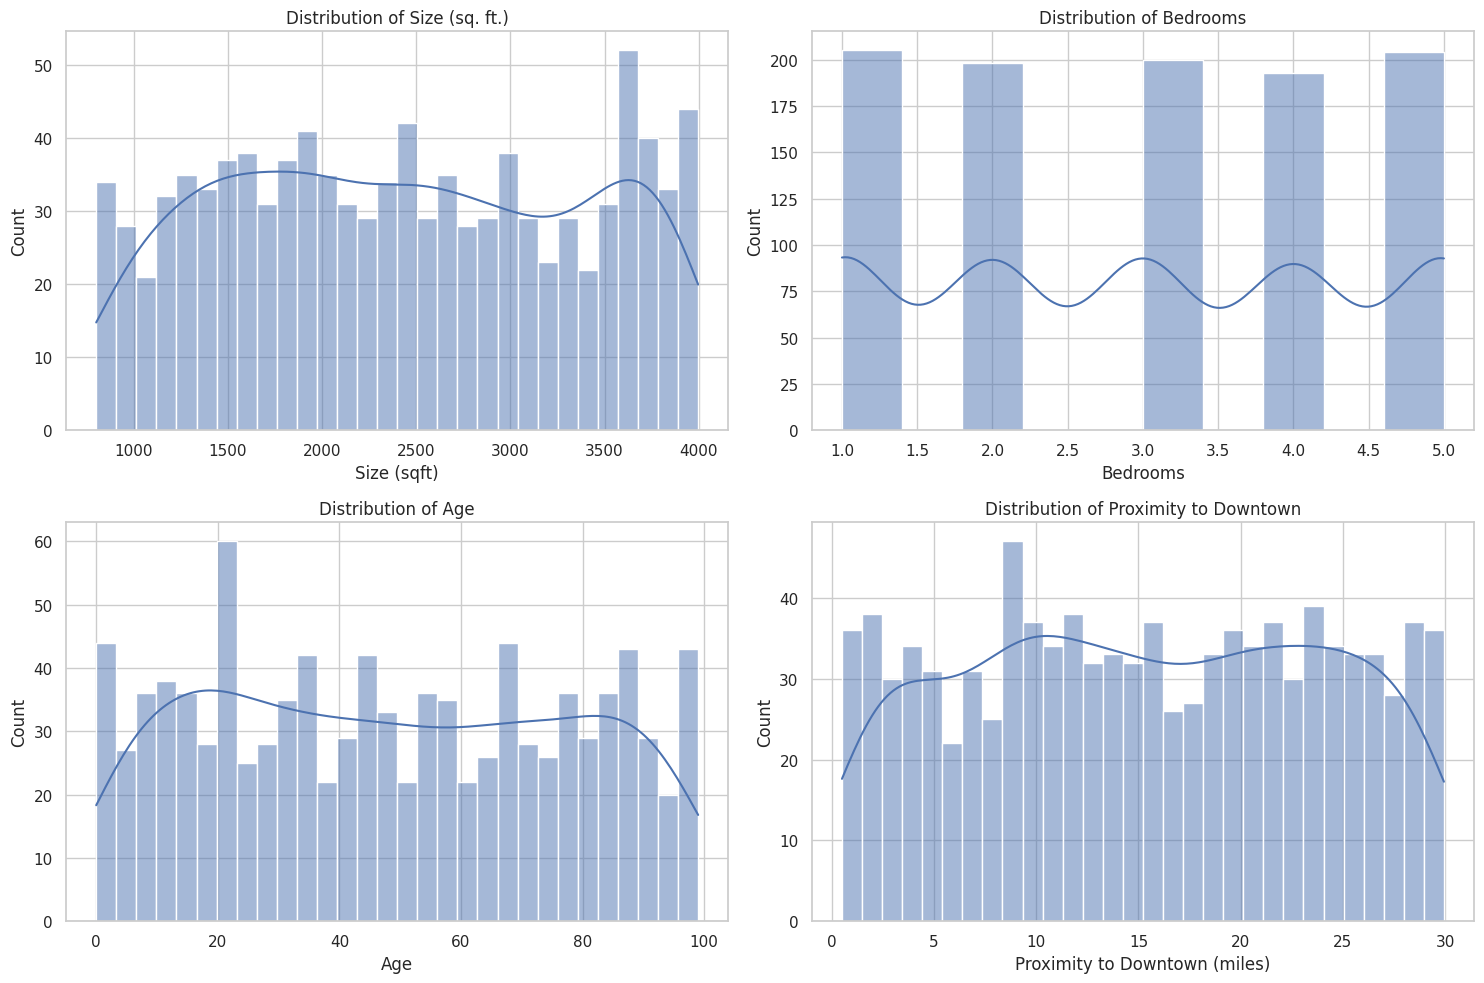

In [ ]:
plt.figure(figsize=(15, 10))

# Histogram for Size
plt.subplot(2, 2, 1)
sns.histplot(data['Size (sqft)'], bins=30, kde=True)
plt.title('Distribution of Size (sq. ft.)')

# Histogram for Bedrooms
plt.subplot(2, 2, 2)
sns.histplot(data['Bedrooms'], bins=10, kde=True)
plt.title('Distribution of Bedrooms')

# Histogram for Age
plt.subplot(2, 2, 3)
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')

# Histogram for Proximity to Downtown
plt.subplot(2, 2, 4)
sns.histplot(data['Proximity to Downtown (miles)'], bins=30, kde=True)
plt.title('Distribution of Proximity to Downtown')

plt.tight_layout()
plt.show()

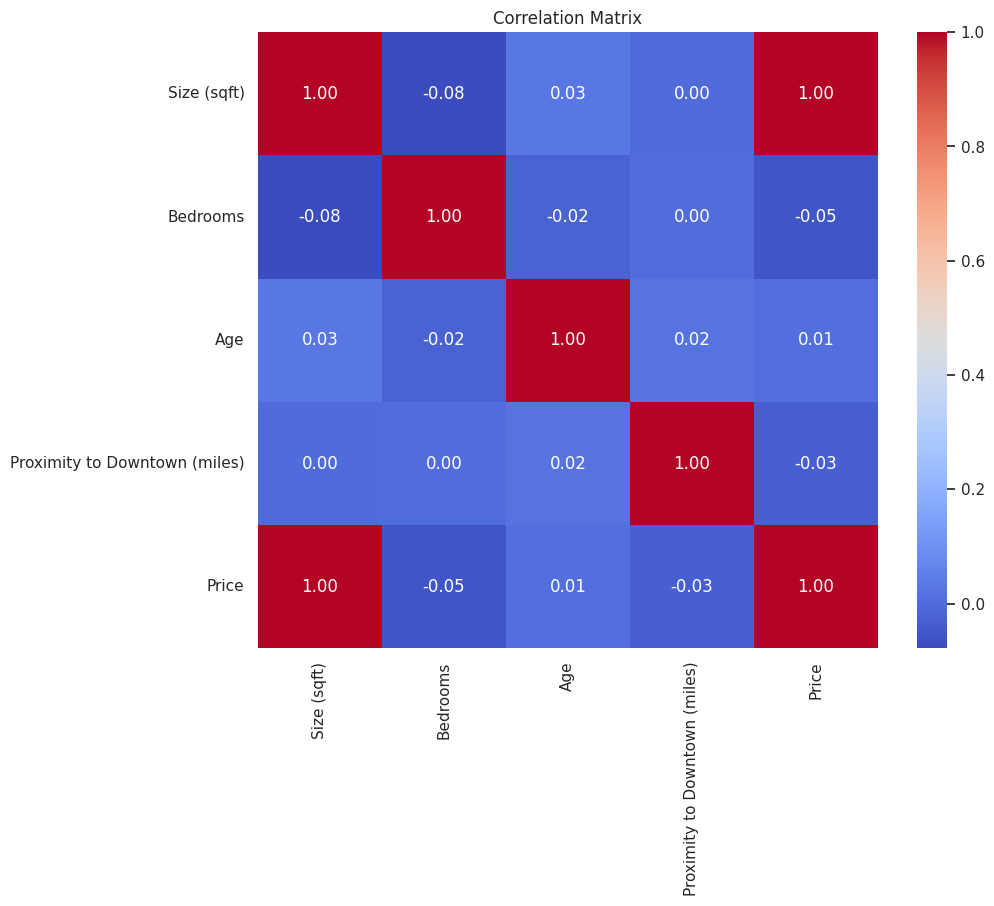

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **2. Data Preprocessing**

Handle any missing data appropriately.

In [ ]:
print(data.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


Normalize or standardize the data to ensure that all features are on a similar scale.

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']])
y = data['Price']

# **3. Model Development**

Implement a multiple regression model using Python (you may use libraries such as Scikit-learn for this task).

Train the model on a training set (use a 70-30 split between training and test data).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()


Perform feature selection if necessary to identify the most significant predictors.

In [ ]:
rfe = RFE(model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)

X_train_df = pd.DataFrame(X_train)

selected_features = X_train_df.columns[rfe.support_]
print("Selected features:", selected_features)

X_train_selected = pd.DataFrame(X_train, columns=X_train_df.columns)[selected_features]
X_test_selected = pd.DataFrame(X_test, columns=X_train_df.columns)[selected_features]

model.fit(X_train_selected, y_train)

r_squared = model.score(X_test_selected, y_test)
print("R-squared:", r_squared)

Selected features: Index([0, 1, 3], dtype='int64')
R-squared: 0.9982427190575796


# **4. Model Evaluation**

Evaluate the model's performance using metrics such as Mean Squared Error (MSE), R-squared, and Adjusted R-squared.

Mean Squared Error (MSE): 128679770.26167312
R-squared: 0.9982427190575796
Adjusted R-squared: 0.9982249087777577

Model Coefficients:
0: 278664.85
1: 7157.32
3: -8515.08


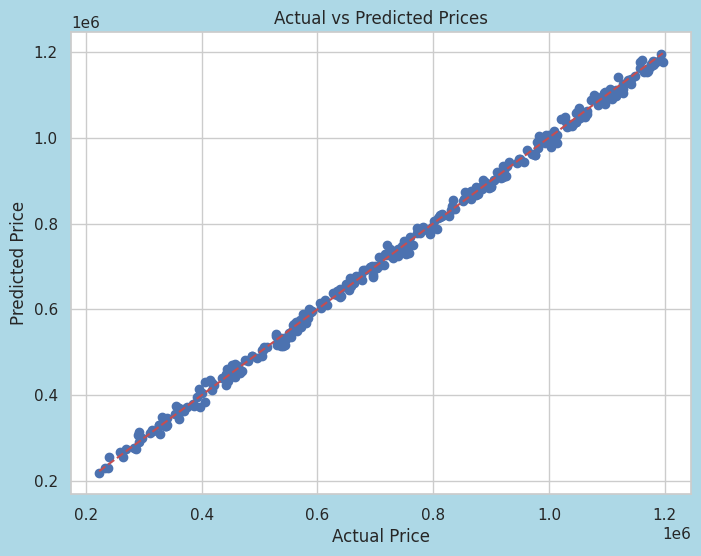

In [ ]:
y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

n = len(y_test)
p = len(selected_features)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

print("\nModel Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature}: {coef:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.gcf().patch.set_facecolor('lightblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()